In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import poisson

from Class_utils.parameters import file_paths, matching_par

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
%reload_ext autoreload
%autoreload 2

In [2]:
dt_language = pd.read_csv(file_paths["languages_path"],index_col=0)
dt_language.sort_values("Prob",ascending=False,inplace=True)

df_language_level = pd.read_csv(file_paths["languages_level_path"],index_col=0) # dataframe with language levels
df_language_level = df_language_level.merge(dt_language, left_index=True, right_index=True)
df_language_level.sort_values(by="Prob",ascending=False).drop("Prob",axis=1,inplace=True)

poisson_dist = pd.DataFrame([poisson(lam=2) for _ in range(60000)], columns=["Values"])
opt_lang_dist = pd.DataFrame(file_paths["opt_lang_distribution"], columns=["Dist"])

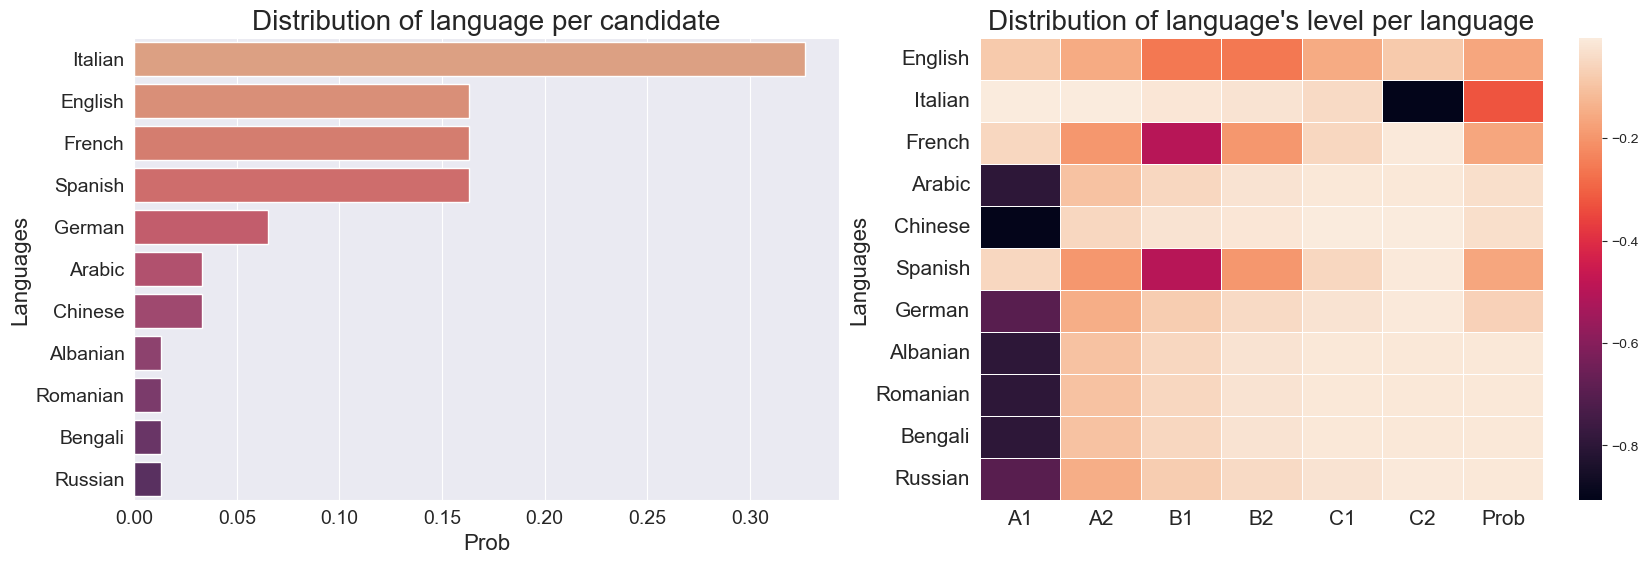

In [3]:
_, axs = plt.subplots(ncols=2,nrows=1,figsize=(20, 6))

sns.barplot(x=dt_language["Prob"], y=dt_language.index, data=dt_language, palette="flare", ax=axs[0])
axs[0].set_title('Distribution of language per candidate', fontsize=20)
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_xlabel(axs[0].get_xlabel(), fontsize=16)
axs[0].set_ylabel(axs[0].get_ylabel(), fontsize=16)

sns.heatmap(-df_language_level, linewidths=.5, ax=axs[1])
axs[1].set_title('Distribution of language\'s level per language', fontsize=20)
axs[1].tick_params(axis='both', labelsize=15)
axs[1].set_ylabel(axs[0].get_ylabel(), fontsize=16)

plt.show()

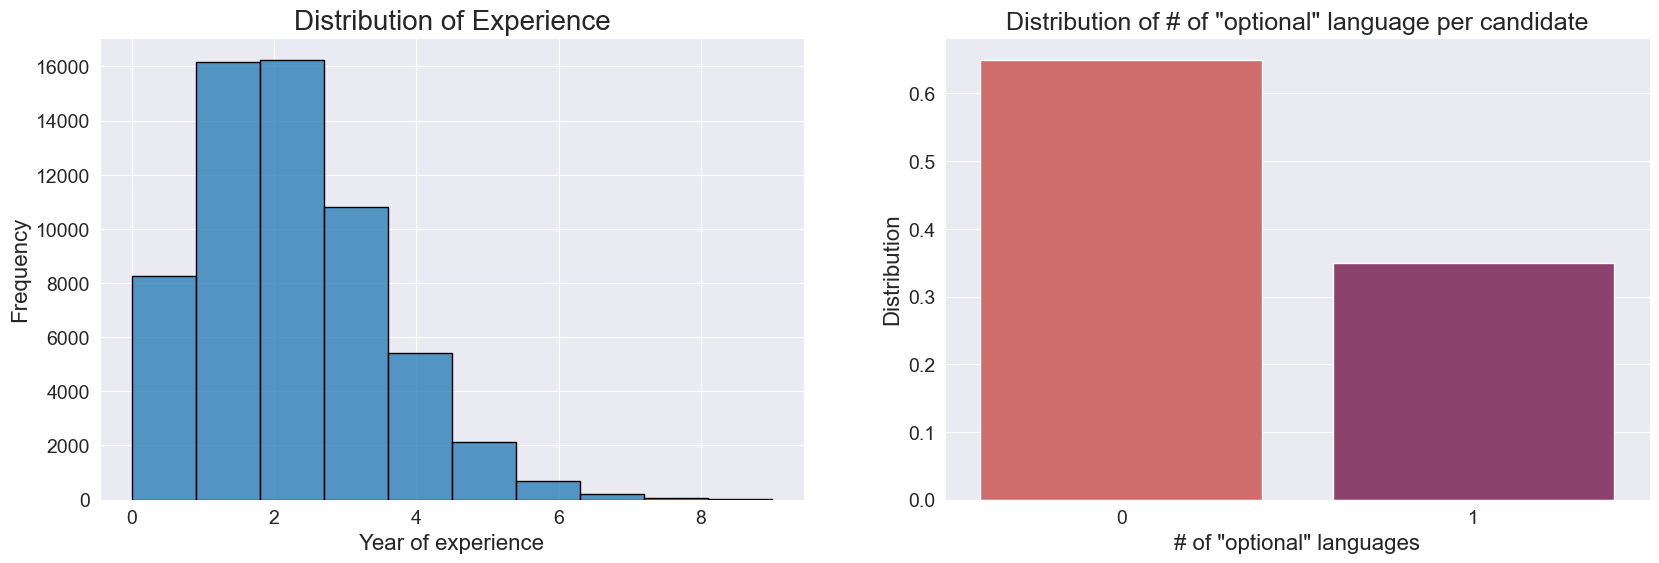

In [4]:
_, axs = plt.subplots(ncols=2,nrows=1,figsize=(20,6))

sns.histplot(poisson_dist["Values"], bins=10, edgecolor='black', ax=axs[0])
axs[0].set_title('Distribution of Experience', fontsize=20)
axs[0].set_xlabel('Year of experience', fontsize=16)
axs[0].set_ylabel('Frequency', fontsize=16)
axs[0].tick_params(axis='both', labelsize=14)


sns.barplot(y=opt_lang_dist["Dist"], x=opt_lang_dist.index, data=opt_lang_dist, palette="flare", ax=axs[1])
axs[1].set_title('Distribution of # of "optional" language per candidate', fontsize=18)
axs[1].set_xlabel('# of "optional" languages', fontsize=16)
axs[1].set_ylabel('Distribution', fontsize=16)
axs[1].tick_params(axis='both', labelsize=14)

plt.show()

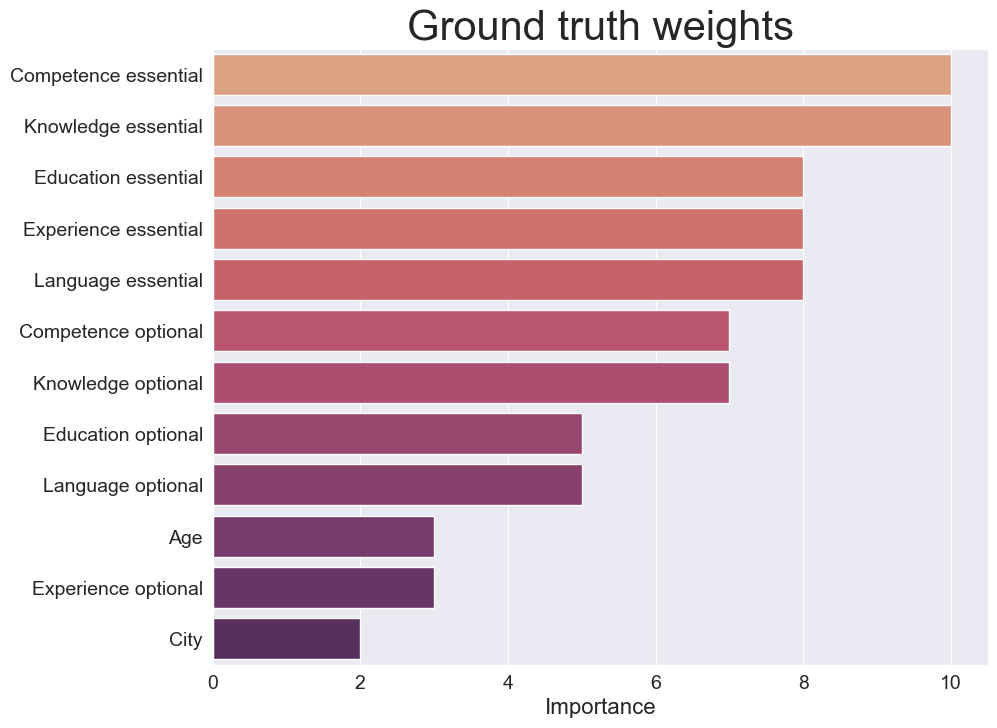

In [21]:
ground_truth = pd.DataFrame(list(matching_par["weight"].items()),
                            columns=['feature', 'importance']).sort_values(by="importance", ascending=False)

_, axs = plt.subplots(figsize=(10, 8))
sns.barplot(x="importance", y="feature", data=ground_truth, palette="flare", ax=axs)
axs.set_title("Ground truth weights", fontsize=30)
axs.tick_params(axis='both', labelsize=20)
axs.set_xlabel('Importance', fontsize=16)
axs.set_ylabel('', fontsize=16)
axs.tick_params(axis='both', labelsize=14)
plt.show()

In [44]:
synonyms = pd.read_csv("../sources/skills_synonyms.csv")

In [45]:
dist = synonyms.groupby("label").count()["uri_skill"].tolist()
dist = [dist.count(i) for i in range(1, max(dist)+1)]
dist = pd.DataFrame(dist,index=[1,2,3,4],columns=["Count"])

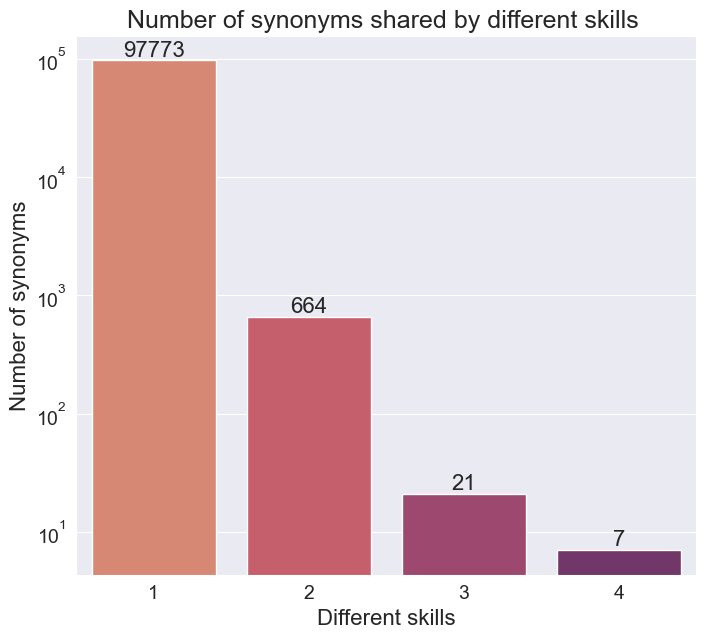

In [64]:
_, axs = plt.subplots(figsize=(8, 7))
sns.barplot(x=dist.index, y="Count", data=dist, palette="flare", ax=axs)
axs.set_yscale("log")
axs.set_title('Number of synonyms shared by different skills ', fontsize=18)
axs.set_xlabel('Different skills', fontsize=16)
axs.set_ylabel('Number of synonyms', fontsize=16)
axs.tick_params(axis='both', labelsize=14)

for index, value in enumerate(dist["Count"]):
    axs.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=16)
    